<center><h1>Xie_Qinghui_HW4</h1></center>
<br>
<br>

Name: Qinghui Xie
<br>
Github Username: qxie44
<br>
USC ID: 7956658480

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [20]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Get the AReM Data Set

In [21]:
pathToData = '../data/AReM'
#Bending1 - 7ds, Bending2 - 7ds, others- 15ds
activity = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']


### (b) Splitting Data

In [22]:
df4 = pd.read_csv('../data/AReM/bending2/dataset4.csv', delim_whitespace=True, skiprows=5, skipfooter=1, engine='python', header=None)
df4.columns = ['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
df4.head(10)
#data.to_csv('cleaned_bending2_data.csv', index=False)
#chatgpt: how do I replace this newly cleaned file into the existing dataset4 file when going through the loop below:
#"if i == 'bending2':
#                # Use the cleaned df4 DataFrame instead of reading from the file
#                testData.append(df4)
#            else:
#                # Load test data and add a label
#                df = pd.read_csv(file_path, skiprows=4)
#                df['label'] = i  # Use the activity name as the label
#               testData.append(df)"

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                0      32.50       0.50       0.00       0.00      19.00   
1              250      32.50       0.50       0.00       0.00      18.50   
2              500      32.75       0.43       1.00       0.00      18.00   
3              750      32.50       0.50       0.00       0.00      17.50   
4             1000      32.50       0.50       7.50       0.50      17.50   
5             1250      32.67       0.47      11.00       1.00      16.75   
6             1500      32.50       0.50       6.25       0.83      18.00   
7             1750      32.50       0.50       3.50       0.87      18.00   
8             2000      32.33       0.47       6.00       0.00      18.33   
9             2250      32.67       0.47       8.00       0.82      18.00   

   var_rss23  
0       1.00  
1       0.50  
2       0.00  
3       0.50  
4       0.87  
5       0.83  
6       0.00  
7       0.00  
8       0.47  
9       0.00

In [23]:
#test: for bending keep 1-2, the rest 1-3
#train: the rest
filesForTesting = {
    'bending1': ['dataset1.csv', 'dataset2.csv'],
    'bending2': ['dataset1.csv', 'dataset2.csv'],
    'cycling': ['dataset1.csv', 'dataset2.csv', 'dataset3.csv'],
    'lying': ['dataset1.csv', 'dataset2.csv', 'dataset3.csv'],
    'sitting': ['dataset1.csv', 'dataset2.csv', 'dataset3.csv'],
    'standing': ['dataset1.csv', 'dataset2.csv', 'dataset3.csv'],
    'walking': ['dataset1.csv', 'dataset2.csv', 'dataset3.csv']
}
testData = []
trainData =[]

#loops through all the activites and loads them to testing data
for i in activity:
    path = os.path.join(pathToData, i)
    if i in ['bending1', 'bending2']:
        files_for_test = filesForTesting[i]
    else:
        files_for_test = filesForTesting[i]

    for file_name in os.listdir(path):
        file_path = os.path.join(path, file_name)
        if file_name in files_for_test:
            # Load test data and add a label
            df = pd.read_csv(file_path, skiprows=4)
            df['label'] = i  # Use the activity name as the label
            testData.append(df)
        else:
            #this specific dataset has wrong delim, replace when it gets to ds4 in bending
            if i == 'bending2' and file_name == 'dataset4.csv':
                df4['label'] = i 
                trainData.append(df4)
            # Load training data and add a label
            else:
                df = pd.read_csv(file_path, skiprows=4, skipfooter=1, engine='python')
                df['label'] = i  # Use the activity name as the label
                trainData.append(df)
            

In [24]:
for df in trainData[:1]:
    print(df.head(10)) 


   # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                0      42.00       0.00      18.50       0.50      12.00   
1              250      42.00       0.00      18.00       0.00      11.33   
2              500      42.75       0.43      16.75       1.79      18.25   
3              750      42.50       0.50      16.75       0.83      19.00   
4             1000      43.00       0.82      16.25       0.83      18.00   
5             1250      43.67       0.47      12.75       0.83      19.00   
6             1500      43.50       0.50      12.00       0.00      19.75   
7             1750      43.50       0.50      13.75       0.83      18.50   
8             2000      43.33       0.47      15.33       0.47      20.50   
9             2250      43.50       0.50      18.00       1.87      20.50   

   var_rss23     label  
0       0.00  bending1  
1       0.94  bending1  
2       0.43  bending1  
3       1.22  bending1  
4       0.00  bending1  
5 

In [25]:
for i, df in enumerate(trainData):
    #new label
    trainData[i]['train_test'] = 'train'
for i, df in enumerate(testData):
    testData[i]['train_test'] = 'test'

for df in trainData[:2]:
    print(df.head(3)) 

   # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                0      42.00       0.00      18.50       0.50      12.00   
1              250      42.00       0.00      18.00       0.00      11.33   
2              500      42.75       0.43      16.75       1.79      18.25   

   var_rss23     label train_test  
0       0.00  bending1      train  
1       0.94  bending1      train  
2       0.43  bending1      train  
   # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                0      41.25       1.30      24.00       0.00      32.33   
1              250      41.00       1.00      22.50       1.12      33.50   
2              500      44.25       0.83      21.75       0.83      31.50   

   var_rss23     label train_test  
0       0.94  bending1      train  
1       0.87  bending1      train  
2       1.50  bending1      train  


### (c) Feature Extraction

In [26]:
#created function since we are doing it multiple times to all data
def featureExtraction(data):
    features = {
        'min': data.min(),
        'max': data.max(),
        'mean': data.mean(),
        'median': data.median(),
        'std': data.std(),
        'Q1': data.quantile(0.25),
        'Q3': data.quantile(0.75),
    }
    return features

In [27]:
dataTableFeatures = []

# Process each DataFrame in trainData and testData
for df_list in [trainData, testData]:
    for df in df_list:
        # Extract the last 6 columns with the features
        columns_toExtract = df.iloc[:, -8:-2]
        # Initialize a dictionary to hold the aggregated features for the last 6 columns
        aggregated_features = {}
        # Calculate the desired statistics for each of the last 6 columns
        # Rename for the corresponding time series
        columns_toExtract.columns = [str(i) for i in range(1, 7)]
        label = df['label'].iloc[0]  

        for column in columns_toExtract.columns:
            aggregated_features[column] = featureExtraction(columns_toExtract[column])
        
        # Add the last two columns ('label' and 'train_test')
        aggregated_features['label'] = df['label'].iloc[0] 
        aggregated_features['train_test'] = df['train_test'].iloc[0]

        # Append to table
        dataTableFeatures.append(aggregated_features)

# Convert the list of dictionaries to a DataFrame
final_table = pd.DataFrame(dataTableFeatures)
# Flatten for visibility, object to float :D
dfFinalTable = pd.json_normalize(final_table.to_dict(orient='records'))

dfFinalTable.head(10)




label train_test  1.min  1.max     1.mean  1.median     1.std    1.Q1  \
0  bending1      train  36.25  48.00  43.968017     44.50  1.619873  43.290   
1  bending1      train  37.00  48.00  43.459040     43.25  1.384657  42.500   
2  bending1      train  33.00  47.75  42.177578     43.50  3.674177  39.100   
3  bending1      train  33.00  45.75  41.678434     41.75  2.245821  41.330   
4  bending1      train  35.00  47.40  43.947620     44.33  1.553152  43.000   
5  bending2      train  25.00  47.50  31.067766     29.75  4.830337  27.500   
6  bending2      train  27.50  33.00  29.885866     30.00  1.151825  29.000   
7  bending2      train  19.00  45.50  30.929624     29.00  7.689931  26.750   
8  bending2      train  21.00  50.00  32.586033     33.00  6.244664  26.125   
9   cycling      train  26.75  44.75  36.866221     36.33  3.558957  34.500   

     1.Q3  2.min  ...     5.std    5.Q1    5.Q3  6.min  6.max    6.mean  \
0  44.670    0.0  ...  3.321655  20.500  23.750    0.0   2.96  0.555428   
1  45.000    0.0  ...  2.448733  22.250  24.000    0.0   5.26  0.678518   
2  45.000    0.0  ...  3.845985  30.500  36.330    0.0   2.18  0.613904   
3  42.750    0.0  ...  2.413538  28.415  31.250    0.0   1.79  0.384092   
4  45.000    0.0  ...  2.001635  35.450  36.500    0.0   1.79  0.491608   
5  31.875    0.0  ...  7.844268   9.000  18.375    0.0   4.92  1.100397   
6  30.290    0.0  ...  1.747046  17.000  19.000    0.0   6.40  0.701002   
7  38.000    0.0  ...  5.837136  15.000  20.750    0.0   6.73  1.108622   
8  34.500    0.0  ...  5.037309  17.670  23.500    0.0  13.61  1.162380   
9  39.750    0.0  ...  2.654070  15.000  18.670    0.0   8.81  2.773382   

   6.median     6.std  6.Q1   6.Q3  
0      0.49  0.488330  0.00  0.830  
1      0.50  0.622693  0.43  0.870  
2      0.50  0.524798  0.00  1.000  
3      0.43  0.389176  0.00  0.500  
4      0.43  0.512714  0.00  0.940  
5      0.94  0.830830  0.50  1.300  
6      0.71  0.481412  0.47  0.940  
7      0.83  1.081614  0.47  1.300  
8      0.83  1.334353  0.47  1.300  
9      2.59  1.571559  1.64  3.635  

[10 rows x 44 columns]

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

In [28]:
train_df = dfFinalTable[dfFinalTable['train_test'] == 'train']
#change values of bending to 1 and the rest to 0
train_df['label'] = train_df['label'].apply(lambda x: 1 if x in ['bending1', 'bending2'] else 0)
#the columns to compare
columns_to_plot = ['1.mean', '2.mean', '6.mean', '1.median', '2.median', '6.median', '1.std', '2.std', '6.std', 'label']
train_df.head(10)

label train_test  1.min  1.max     1.mean  1.median     1.std    1.Q1  \
0      1      train  36.25  48.00  43.968017     44.50  1.619873  43.290   
1      1      train  37.00  48.00  43.459040     43.25  1.384657  42.500   
2      1      train  33.00  47.75  42.177578     43.50  3.674177  39.100   
3      1      train  33.00  45.75  41.678434     41.75  2.245821  41.330   
4      1      train  35.00  47.40  43.947620     44.33  1.553152  43.000   
5      1      train  25.00  47.50  31.067766     29.75  4.830337  27.500   
6      1      train  27.50  33.00  29.885866     30.00  1.151825  29.000   
7      1      train  19.00  45.50  30.929624     29.00  7.689931  26.750   
8      1      train  21.00  50.00  32.586033     33.00  6.244664  26.125   
9      0      train  26.75  44.75  36.866221     36.33  3.558957  34.500   

     1.Q3  2.min  ...     5.std    5.Q1    5.Q3  6.min  6.max    6.mean  \
0  44.670    0.0  ...  3.321655  20.500  23.750    0.0   2.96  0.555428   
1  45.000    0.0  ...  2.448733  22.250  24.000    0.0   5.26  0.678518   
2  45.000    0.0  ...  3.845985  30.500  36.330    0.0   2.18  0.613904   
3  42.750    0.0  ...  2.413538  28.415  31.250    0.0   1.79  0.384092   
4  45.000    0.0  ...  2.001635  35.450  36.500    0.0   1.79  0.491608   
5  31.875    0.0  ...  7.844268   9.000  18.375    0.0   4.92  1.100397   
6  30.290    0.0  ...  1.747046  17.000  19.000    0.0   6.40  0.701002   
7  38.000    0.0  ...  5.837136  15.000  20.750    0.0   6.73  1.108622   
8  34.500    0.0  ...  5.037309  17.670  23.500    0.0  13.61  1.162380   
9  39.750    0.0  ...  2.654070  15.000  18.670    0.0   8.81  2.773382   

   6.median     6.std  6.Q1   6.Q3  
0      0.49  0.488330  0.00  0.830  
1      0.50  0.622693  0.43  0.870  
2      0.50  0.524798  0.00  1.000  
3      0.43  0.389176  0.00  0.500  
4      0.43  0.512714  0.00  0.940  
5      0.94  0.830830  0.50  1.300  
6      0.71  0.481412  0.47  0.940  
7      0.83  1.081614  0.47  1.300  
8      0.83  1.334353  0.47  1.300  
9      2.59  1.571559  1.64  3.635  

[10 rows x 44 columns]

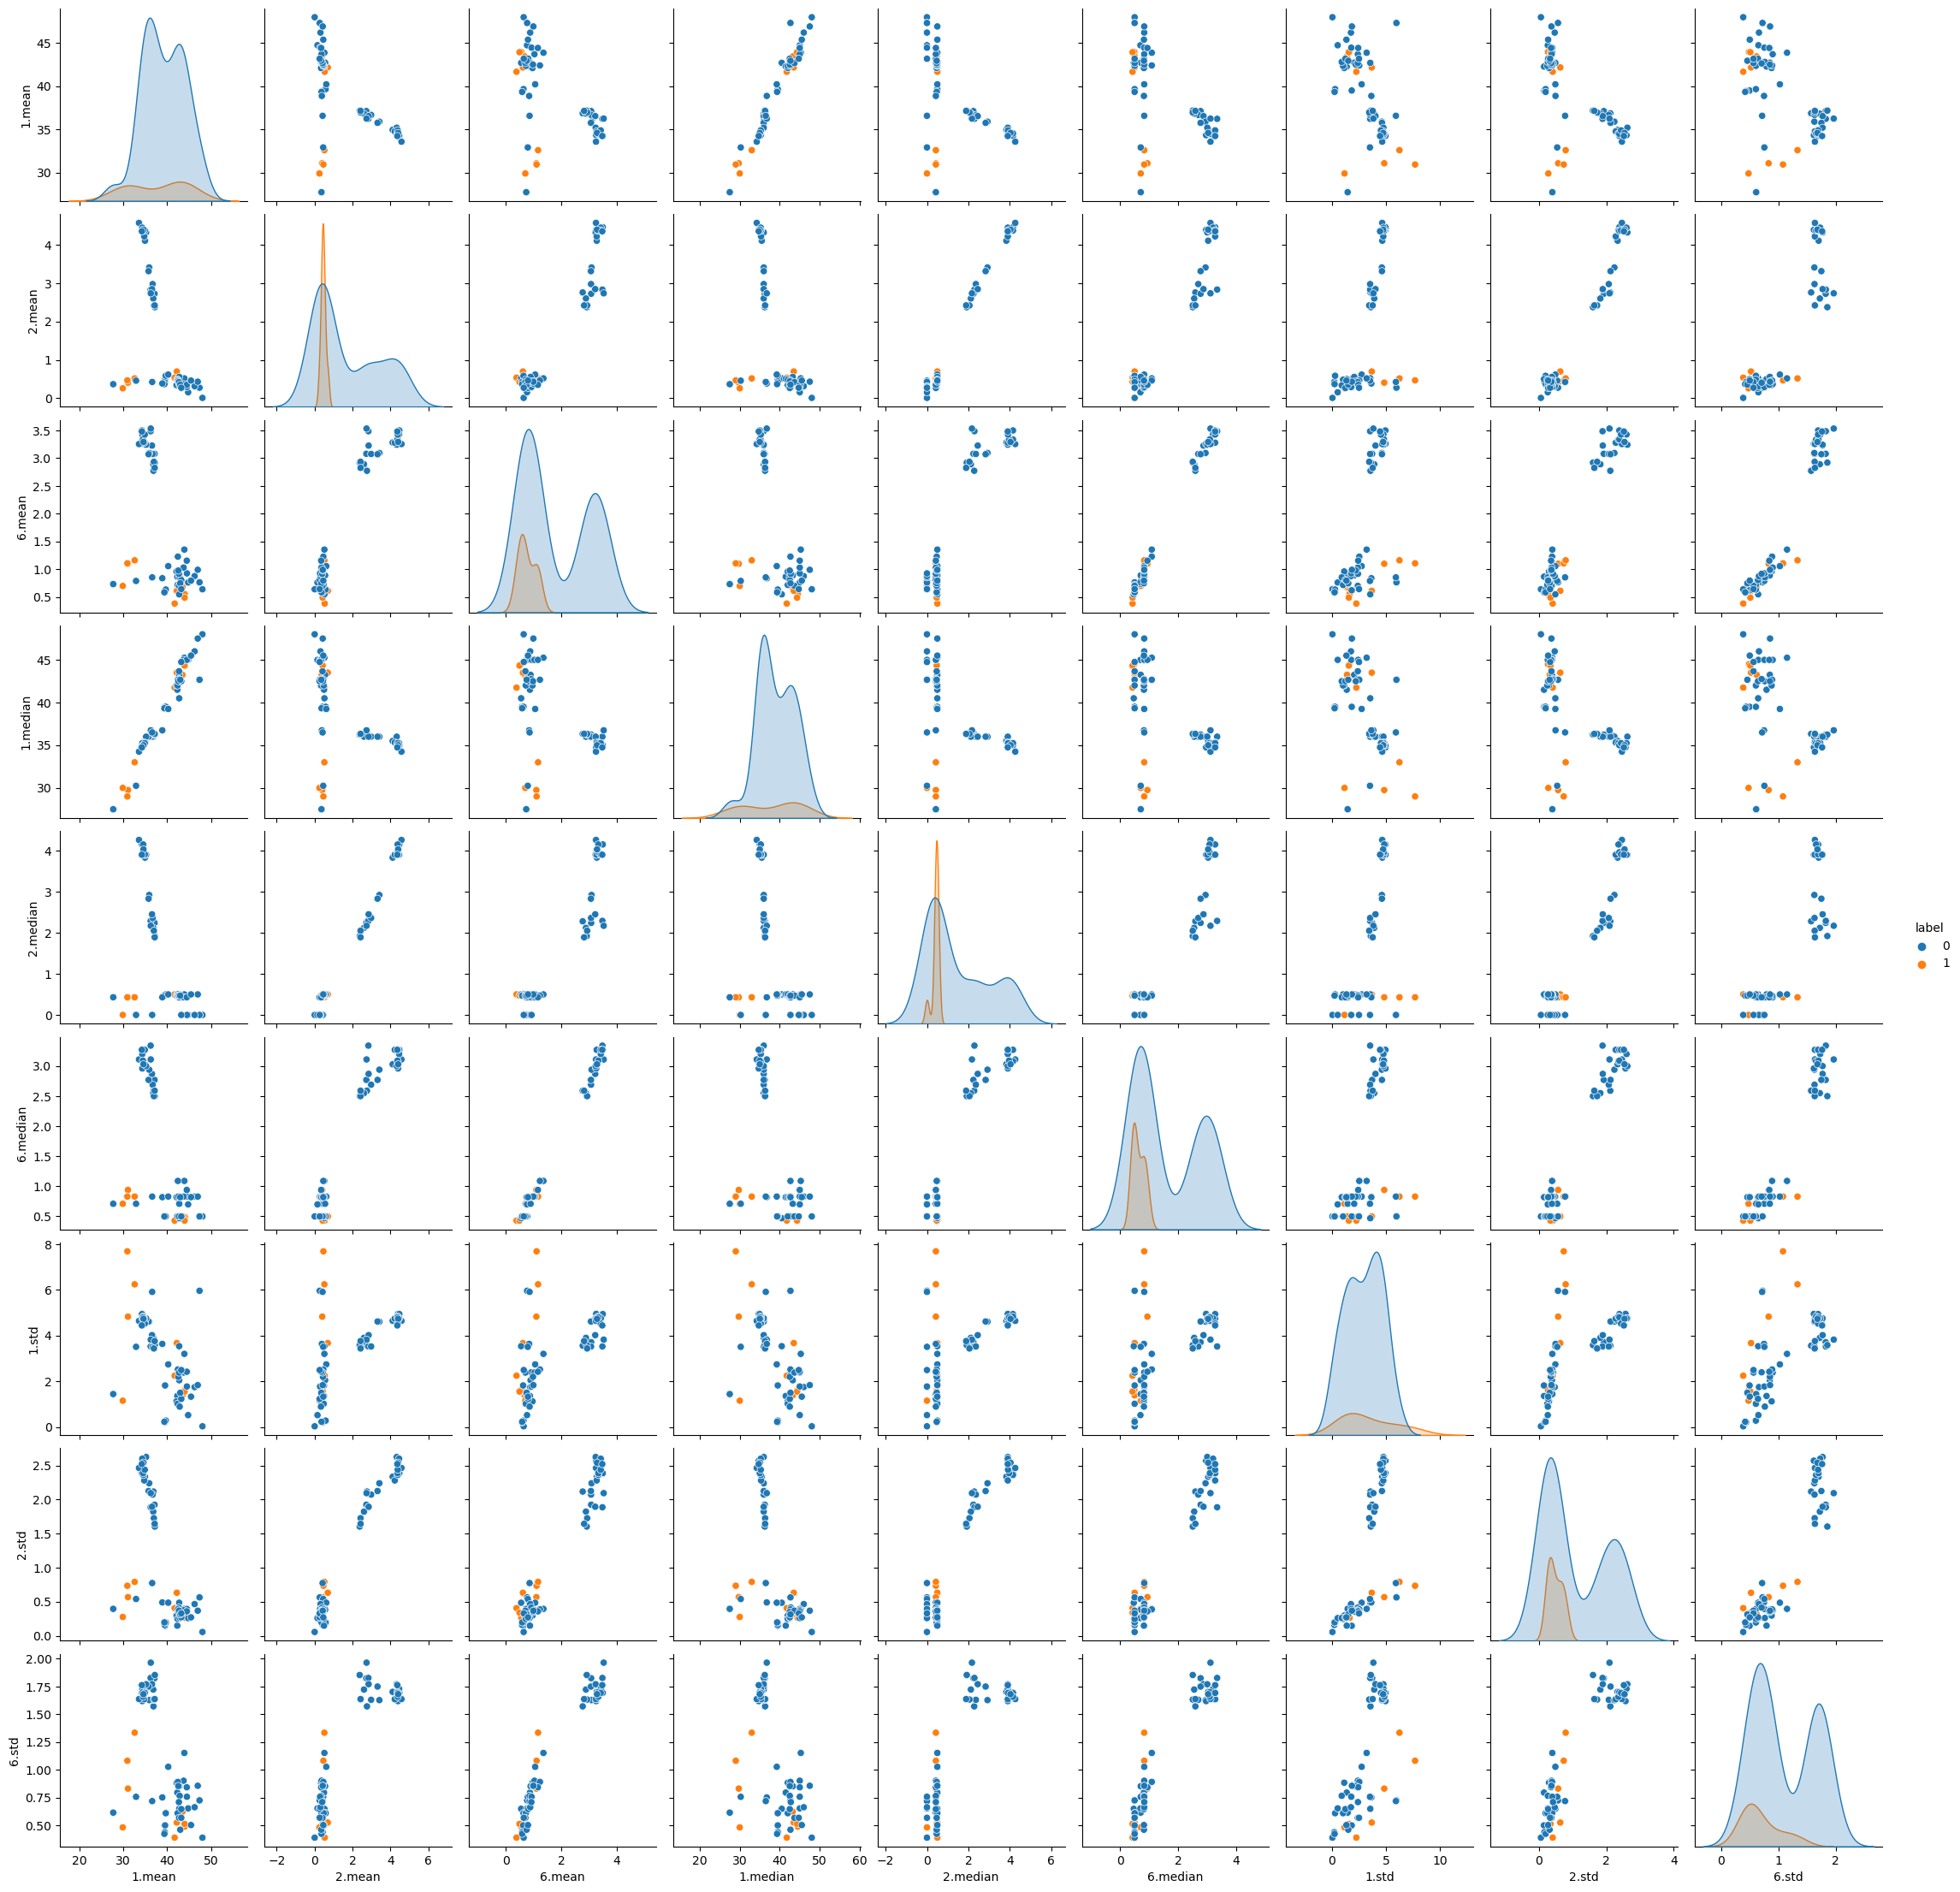

In [29]:
sns.pairplot(train_df[columns_to_plot], hue='label')
plt.show()

#### ii. Splitted Plots

In [30]:
def splitTime(df):
    n = len(df)
    #half of the df
    mid = n // 2  
    df1 = df.iloc[:mid]  
    df2 = df.iloc[mid:]  

    return df1, df2

In [31]:
def featureExtraction2(data, suffix=''):
    feature_names = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
    features = {}
    
    for feature in feature_names:
        # Calculate features and add to dictionary with formatted keys
        features[f'{feature_names.index(feature) + 1}.min{suffix}'] = data[feature].min()
        features[f'{feature_names.index(feature) + 1}.max{suffix}'] = data[feature].max()
        features[f'{feature_names.index(feature) + 1}.mean{suffix}'] = data[feature].mean()
        features[f'{feature_names.index(feature) + 1}.median{suffix}'] = data[feature].median()
        features[f'{feature_names.index(feature) + 1}.std{suffix}'] = data[feature].std()
        features[f'{feature_names.index(feature) + 1}.q1{suffix}'] = data[feature].quantile(0.25)
        features[f'{feature_names.index(feature) + 1}.q3{suffix}'] = data[feature].quantile(0.75)

    return features

In [32]:
dataTableFeatures = []
# Train and test
for df_list in [trainData, testData]:
    for df in df_list:
        # Split the DataFrame into two halves
        df_a, df_b = splitTime(df)
        def extract_and_suffix_features(df_part, suffix):
            # Extract the last 6 columns with the features
            columns_toExtract = df_part.iloc[:, -8:-2]
            # Rename the columns for the corresponding time series (1-6)
            columns_toExtract.columns = [str(i) for i in range(1, 7)]
            aggregated_features = {}
            for column in columns_toExtract.columns:
                features = featureExtraction(columns_toExtract[column])
                for stat_name, value in features.items():
                    aggregated_features[f'{column}.{stat_name}{suffix}'] = value
            
            return aggregated_features

        features_a = extract_and_suffix_features(df_a, '.a')
        features_b = extract_and_suffix_features(df_b, '.b')
        combined_features = {**features_a, **features_b}

        # Add label and train_test at the end
        combined_features['label'] = df['label'].iloc[0]
        combined_features['train_test'] = df['train_test'].iloc[0]

        dataTableFeatures.append(combined_features)
        

timesplitdf = pd.DataFrame(dataTableFeatures)

# Flatten the DataFrame for better visibility
timesplittable = pd.json_normalize(timesplitdf.to_dict(orient='records'))

# Display the first 10 rows
timesplittable.head(10)


1.min.a  1.max.a   1.mean.a  1.median.a   1.std.a  1.Q1.a  1.Q3.a  2.min.a  \
0    36.67    45.00  43.487197       43.75  1.284575  42.330  44.500      0.0   
1    39.00    48.00  44.118912       45.00  1.362381  43.500  45.000      0.0   
2    33.75    47.75  43.275858       45.00  3.480329  42.000  45.250      0.0   
3    33.00    45.75  41.618577       42.33  3.124922  39.635  44.250      0.0   
4    36.50    46.50  44.060544       44.50  1.559358  43.250  45.000      0.0   
5    25.00    47.50  34.127824       30.50  5.100946  30.000  39.415      0.0   
6    29.00    33.00  30.718536       30.33  0.935121  30.000  31.500      0.0   
7    19.00    39.25  29.224142       27.00  6.207188  26.000  36.000      0.0   
8    21.00    50.00  32.003975       26.00  8.760326  24.710  42.000      0.0   
9    26.75    44.50  36.818577       36.33  3.665919  34.670  39.750      0.0   

   2.max.a  2.mean.a  ...   5.Q3.b  6.min.b  6.max.b  6.mean.b  6.median.b  \
0     1.12  0.374812  ...  23.5000      0.0     2.96  0.586625       0.500   
1     1.30  0.249121  ...  23.7500      0.0     4.06  0.540583       0.500   
2     3.00  0.671004  ...  33.7500      0.0     2.18  0.584292       0.470   
3     2.83  0.623891  ...  30.8125      0.0     1.50  0.347500       0.430   
4     1.50  0.379163  ...  36.2500      0.0     1.50  0.388333       0.000   
5     6.38  0.530711  ...  13.7500      0.0     4.92  1.205167       1.000   
6     1.00  0.298410  ...  19.2500      0.0     1.50  0.675833       0.710   
7     4.33  0.499121  ...  24.8125      0.0     5.61  1.114792       0.870   
8     9.90  0.584059  ...  20.0000      0.0     6.02  0.781875       0.605   
9    11.68  2.839540  ...  18.6700      0.0     8.44  2.572208       2.490   

    6.std.b  6.Q1.b  6.Q3.b     label  train_test  
0  0.487952  0.4225   0.830  bending1       train  
1  0.471467  0.4300   0.710  bending1       train  
2  0.493225  0.0000   0.870  bending1       train  
3  0.363144  0.0000   0.500  bending1       train  
4  0.478528  0.0000   0.710  bending1       train  
5  0.834565  0.7100   1.410  bending2       train  
6  0.321735  0.4700   0.940  bending2       train  
7  0.996531  0.4700   1.300  bending2       train  
8  0.769953  0.4700   0.940  bending2       train  
9  1.421899  1.5000   3.415   cycling       train  

[10 rows x 86 columns]

In [33]:
print(timesplittable.columns.tolist())

['1.min.a', '1.max.a', '1.mean.a', '1.median.a', '1.std.a', '1.Q1.a', '1.Q3.a', '2.min.a', '2.max.a', '2.mean.a', '2.median.a', '2.std.a', '2.Q1.a', '2.Q3.a', '3.min.a', '3.max.a', '3.mean.a', '3.median.a', '3.std.a', '3.Q1.a', '3.Q3.a', '4.min.a', '4.max.a', '4.mean.a', '4.median.a', '4.std.a', '4.Q1.a', '4.Q3.a', '5.min.a', '5.max.a', '5.mean.a', '5.median.a', '5.std.a', '5.Q1.a', '5.Q3.a', '6.min.a', '6.max.a', '6.mean.a', '6.median.a', '6.std.a', '6.Q1.a', '6.Q3.a', '1.min.b', '1.max.b', '1.mean.b', '1.median.b', '1.std.b', '1.Q1.b', '1.Q3.b', '2.min.b', '2.max.b', '2.mean.b', '2.median.b', '2.std.b', '2.Q1.b', '2.Q3.b', '3.min.b', '3.max.b', '3.mean.b', '3.median.b', '3.std.b', '3.Q1.b', '3.Q3.b', '4.min.b', '4.max.b', '4.mean.b', '4.median.b', '4.std.b', '4.Q1.b', '4.Q3.b', '5.min.b', '5.max.b', '5.mean.b', '5.median.b', '5.std.b', '5.Q1.b', '5.Q3.b', '6.min.b', '6.max.b', '6.mean.b', '6.median.b', '6.std.b', '6.Q1.b', '6.Q3.b', 'label', 'train_test']


In [34]:
columnA = [
    '1.mean.a', '2.mean.a', '6.mean.a',
    '1.median.a', '2.median.a', '6.median.a',
    '1.std.a', '2.std.a', '6.std.a',
    
    'label'
]
columnB= [
    '1.mean.b', '2.mean.b', '6.mean.b',
    '1.median.b', '2.median.b', '6.median.b',
    '1.std.b', '2.std.b', '6.std.b', 'label'
]

columnAll = [
    '1.mean.a', '2.mean.a', '6.mean.a',
    '1.median.a', '2.median.a', '6.median.a',
    '1.std.a', '2.std.a', '6.std.a',
'1.mean.b', '2.mean.b', '6.mean.b',
    '1.median.b', '2.median.b', '6.median.b',
    '1.std.b', '2.std.b', '6.std.b', 'label'
]

In [35]:
newtrain_df = timesplittable[timesplittable['train_test'] == 'train']
newtrain_df.loc[:, 'label'] = newtrain_df['label'].apply(lambda x: 1 if x in ['bending1', 'bending2'] else 0)
newtrain_df.head(5)

1.min.a  1.max.a   1.mean.a  1.median.a   1.std.a  1.Q1.a  1.Q3.a  2.min.a  \
0    36.67    45.00  43.487197       43.75  1.284575  42.330   44.50      0.0   
1    39.00    48.00  44.118912       45.00  1.362381  43.500   45.00      0.0   
2    33.75    47.75  43.275858       45.00  3.480329  42.000   45.25      0.0   
3    33.00    45.75  41.618577       42.33  3.124922  39.635   44.25      0.0   
4    36.50    46.50  44.060544       44.50  1.559358  43.250   45.00      0.0   

   2.max.a  2.mean.a  ...   5.Q3.b  6.min.b  6.max.b  6.mean.b  6.median.b  \
0     1.12  0.374812  ...  23.5000      0.0     2.96  0.586625        0.50   
1     1.30  0.249121  ...  23.7500      0.0     4.06  0.540583        0.50   
2     3.00  0.671004  ...  33.7500      0.0     2.18  0.584292        0.47   
3     2.83  0.623891  ...  30.8125      0.0     1.50  0.347500        0.43   
4     1.50  0.379163  ...  36.2500      0.0     1.50  0.388333        0.00   

    6.std.b  6.Q1.b  6.Q3.b  label  train_test  
0  0.487952  0.4225    0.83      1       train  
1  0.471467  0.4300    0.71      1       train  
2  0.493225  0.0000    0.87      1       train  
3  0.363144  0.0000    0.50      1       train  
4  0.478528  0.0000    0.71      1       train  

[5 rows x 86 columns]

In [36]:
# sns.pairplot(newtrain_df[moreColumn], hue='label')
# plt.show()

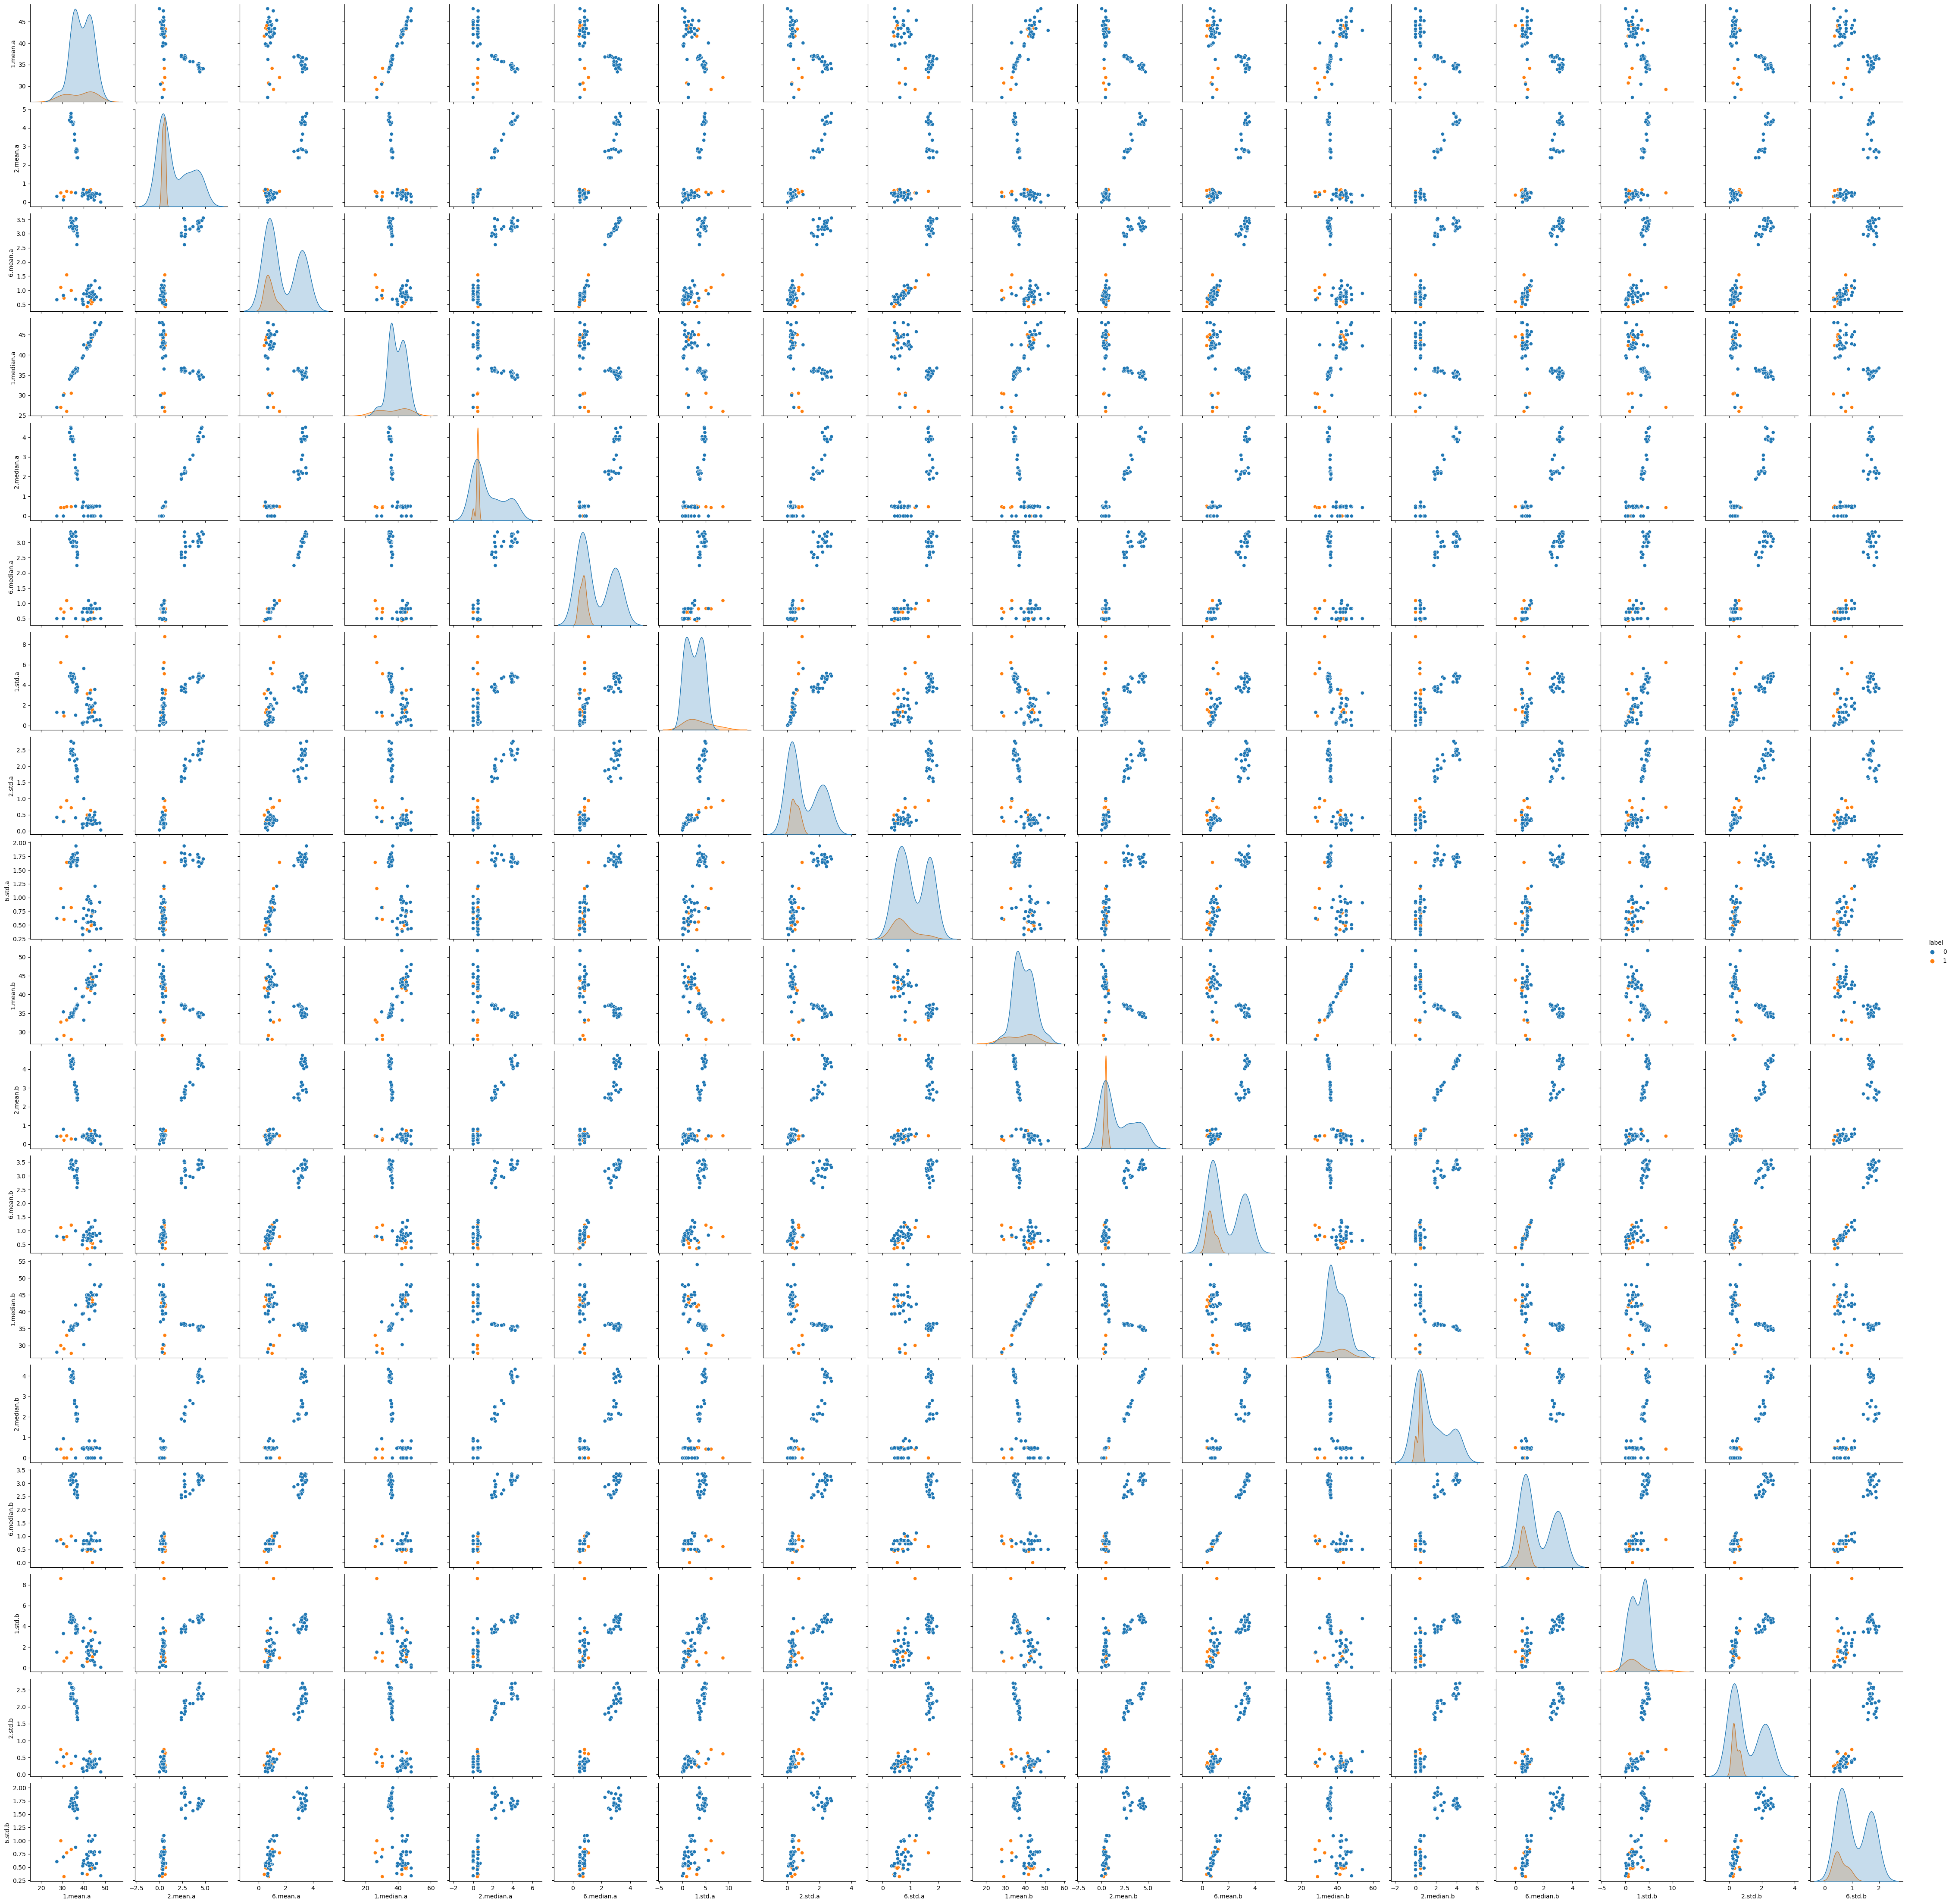

In [37]:
#i was told conflicting information of whether to do 2 8x8 plots or one 18x18 plot, but below is 18x18 however i also have code for 9x9 for both segments
sns.pairplot(newtrain_df[columnAll], hue='label')
plt.show()


They look pretty similar with slight variances between the plot. The median for the second time split is lower for bending.

#### iii. Time Series Segments

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm
import string
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score, auc
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


In [39]:

def featureExtraction3(data):
    features = {
        'min': data.min(),
        'max': data.max(),
        'mean': data.mean(),
        'median': data.median(),
        'std': data.std(),
        'Q1': data.quantile(0.25),
        'Q3': data.quantile(0.75),
    }
    return features

In [40]:
results = []  # Initialize results list to store (l, p, accuracy) pairs

for l in range(1, 21):  # Loop through values of l from 1 to 20
    features_in_table = []
    
    for train_df in trainData:
        num_segments = l  # Number of segments
        segment_length = train_df.shape[0] // num_segments  # Calculate segment length
        segments = [train_df.iloc[i * segment_length:(i + 1) * segment_length] for i in range(num_segments - 1)]
        segments.append(train_df.iloc[(num_segments - 1) * segment_length:])
        
        combined_features = {}
        for i, segment in enumerate(segments):
            suffix = string.ascii_lowercase[i]  
            features = extract_and_suffix_features(segment, f'.{suffix}')
            combined_features.update(features)

        combined_features['label'] = train_df['label'].iloc[0]
        features_in_table.append(combined_features)

    aggdf = pd.DataFrame(features_in_table)
    outputDf = aggdf  # Use aggdf instead of timesplitdf
    outputDf['label'] = outputDf['label'].apply(lambda x: 1 if x in ['bending1', 'bending2'] else 0)

    # Split into features (X) and label (y)
    X = outputDf.drop(columns=['label'])
    y = outputDf['label']

    # (RFECV)
    skf = StratifiedKFold(n_splits=5)
    logistic_model = LogisticRegression(max_iter=2000)  # Logistic regression model
    rfecv = RFECV(estimator=logistic_model, step=1, cv=skf, scoring='accuracy')  # 5-fold CV with RFE
    rfecv.fit(X, y)  # Fit on the entire dataset

    # Get the number of selected features (p) from RFE
    best_p_current = rfecv.n_features_

    # Calculate accuracy on the training data
    accuracy = round(rfecv.cv_results_['mean_test_score'].max(), 4)

    # Store the (l, p, accuracy) results
    results.append({'l': l, 'p': best_p_current, 'accuracy': accuracy})

    print(f" l = {l}, p = {best_p_current}, Accuracy = {accuracy}")

# Find the (l, p) pair with the best accuracy
best_result = max(results, key=lambda x: x['accuracy'])

print(f"\nBest Accuracy = {best_result['accuracy']} with l = {best_result['l']} and p = {best_result['p']}")



 l = 1, p = 5, Accuracy = 0.9571
 l = 2, p = 6, Accuracy = 0.9429
 l = 3, p = 3, Accuracy = 0.9714
 l = 4, p = 1, Accuracy = 0.9714
 l = 5, p = 1, Accuracy = 0.9571
 l = 6, p = 1, Accuracy = 0.9429
 l = 7, p = 1, Accuracy = 0.9714
 l = 8, p = 1, Accuracy = 0.956
 l = 9, p = 4, Accuracy = 0.9571
 l = 10, p = 1, Accuracy = 0.9571
 l = 11, p = 2, Accuracy = 0.9714
 l = 12, p = 4, Accuracy = 0.9714
 l = 13, p = 1, Accuracy = 0.9714
 l = 14, p = 5, Accuracy = 0.9571
 l = 15, p = 20, Accuracy = 0.9571
 l = 16, p = 6, Accuracy = 0.9714
 l = 17, p = 1, Accuracy = 0.9571
 l = 18, p = 4, Accuracy = 0.9714
 l = 19, p = 5, Accuracy = 0.9714
 l = 20, p = 4, Accuracy = 0.9714

Best Accuracy = 0.9714 with l = 3 and p = 3


The right way to do cross-validations is: doing feature elimination at the same time as cross validation. 
The wrong way to do cross-validation is: including the test set and doing it after

#### iv. Confusion Matrix

In [41]:
from statsmodels.api import Logit, add_constant

In [217]:
best_l = 3
best_p = 3
newfeatures_in_table = []

for train_df in trainData:
    num_segments = best_l #using best l
    segment_length = train_df.shape[0] // num_segments  
    # Create segments
    segments = [train_df.iloc[i * segment_length:(i + 1) * segment_length] for i in range(num_segments - 1)]
    segments.append(train_df.iloc[(num_segments - 1) * segment_length:])
    # Combine features from all segments
    combined_features = {}
    for i, segment in enumerate(segments):
        suffix = string.ascii_lowercase[i]  # Get suffix
        features = extract_and_suffix_features(segment, f'.{suffix}')
        combined_features.update(features)

    # Add label to combined features
    combined_features['label'] = train_df['label'].iloc[0]
    newfeatures_in_table.append(combined_features)

# Create a DataFrame from the aggregated features
aggdfBest = pd.DataFrame(newfeatures_in_table)

# Verify the number of columns
print(f"Number of columns in the aggregated DataFrame: {aggdfBest.shape[1]}")

# Update label
aggdfBest['label'] = aggdfBest['label'].apply(lambda x: 1 if x in ['bending1', 'bending2'] else 0)

# Display the resulting DataFrame
display(aggdfBest.head(5))



Number of columns in the aggregated DataFrame: 127


1.min.a  1.max.a   1.mean.a  1.median.a   1.std.a  1.Q1.a  1.Q3.a  2.min.a  \
0    40.75    45.00  43.058239       42.75  0.994320  42.000   43.75      0.0   
1    41.00    48.00  44.797107       45.00  0.797153  45.000   45.00      0.0   
2    35.25    47.75  43.660755       45.00  3.320865  42.875   45.50      0.0   
3    33.00    45.00  40.673836       41.50  3.213350  38.000   43.25      0.0   
4    38.75    46.50  43.952642       44.50  1.387853  42.875   45.00      0.0   

   2.max.a  2.mean.a  ...  5.Q1.c  5.Q3.c  6.min.c  6.max.c  6.mean.c  \
0     1.12  0.408176  ...   20.75    23.0      0.0     2.96  0.630186   
1     1.30  0.174591  ...   22.50    24.0      0.0     4.06  0.516957   
2     3.00  0.586604  ...   27.00    32.5      0.0     2.18  0.617578   
3     2.18  0.694843  ...   27.00    30.0      0.0     1.00  0.301863   
4     1.50  0.347107  ...   36.00    36.5      0.0     1.50  0.363106   

   6.median.c   6.std.c  6.Q1.c  6.Q3.c  label  
0        0.50  0.514158    0.43    0.87      1  
1        0.47  0.525918    0.00    0.71      1  
2        0.47  0.500098    0.43    0.87      1  
3        0.43  0.261651    0.00    0.50      1  
4        0.00  0.448339    0.00    0.50      1  

[5 rows x 127 columns]

In [219]:
# Split into features (X) and label (y)
Xat3 = aggdfBest.drop(columns=['label'])
yat3 = aggdfBest['label']
correlation_matrix = Xat3.corr().abs()
#Chatgpt: I keep getting errors of singular matrix: reason is due do collinearity. Remove those with high correlation
# Set a threshold for dropping features
threshold = 0.8

#  find features with correlation above the threshold
high_correlation_pairs = np.where(correlation_matrix > threshold)

#features to drop
features_to_drop = set()

# Iterate through the pairs
for i, j in zip(*high_correlation_pairs):
    if i != j: #droppign different features
        features_to_drop.add(Xat3.columns[j])  

# Drop the identified features
df_reduced = Xat3.drop(columns=features_to_drop)

In [220]:
Xat3_sm = add_constant(df_reduced)  # Add constant for intercept
logit_model = Logit(yat3, Xat3_sm)
#bfgs to bypass singular linearity error
logit_result = logit_model.fit(method='bfgs')

# Get parameters (coefficients) and p-values
params = logit_result.params
p_values = logit_result.pvalues
# Make predictions on the training data
y_pred_probs = logit_result.predict(Xat3_sm)  # Predicted probabilities
y_pred = np.where(y_pred_probs >= 0.5, 1, 0)  # Convert probabilities to binary predictions

         Current function value: 0.181732
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40


In [221]:
# confusion matrix
conf_matrix = confusion_matrix(yat3, y_pred)
print(conf_matrix)

[[58  2]
 [ 3  6]]


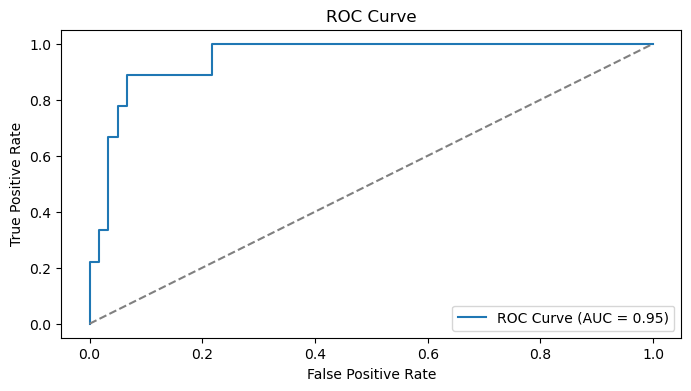

In [222]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(yat3, y_pred_probs)
auc_score = roc_auc_score(yat3, y_pred_probs)

# Plot ROC curve
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()


#### v. Test Classifier

In [223]:
test_features_in_table = []

# Loop through the test dfs
for df in testData:
    # Segment the df based on best_l
    num_segments = best_l
    segment_length = df.shape[0] // num_segments  
    segments = [df.iloc[i * segment_length:(i + 1) * segment_length] for i in range(num_segments - 1)]
    segments.append(df.iloc[(num_segments - 1) * segment_length:])
    # Combine features from all segments
    combined_features = {}
    for i, segment in enumerate(segments):
        suffix = string.ascii_lowercase[i]
        features = extract_and_suffix_features(segment, f'.{suffix}')
        combined_features.update(features)

    # Add label to combined features
    combined_features['label'] = df['label'].iloc[0]
    test_features_in_table.append(combined_features)

# Create a DataFrame from the aggregated features of the test set
agg_test_df = pd.DataFrame(test_features_in_table)
agg_test_df['label'] = agg_test_df['label'].apply(lambda x: 1 if x in ['bending1', 'bending2'] else 0)

# Split into features (X_test) and label (y_test)
X_test = agg_test_df.drop(columns=['label'])
y_test = agg_test_df['label']

display(agg_test_df.head(5))

1.min.a  1.max.a   1.mean.a  1.median.a   1.std.a   1.Q1.a   1.Q3.a  \
0    38.75    42.33  41.362563      42.000  0.954146  41.0000  42.0000   
1    41.75    44.25  42.921750      43.000  0.612032  42.4575  43.5000   
2    12.75    27.00  22.609937      23.750  3.095682  21.0000  24.3300   
3    26.50    30.00  28.792875      29.250  1.171331  27.6275  30.0000   
4    29.33    44.50  36.794750      35.875  3.722530  34.0000  39.8125   

   2.min.a  2.max.a  2.mean.a  ...  5.Q1.c  5.Q3.c  6.min.c  6.max.c  \
0      0.0     1.22  0.256125  ...  30.000   36.00      0.0     1.87   
1      0.0     0.94  0.468438  ...  30.000   33.00      0.0     2.62   
2      0.0     6.76  0.871187  ...  19.500   21.75      0.0     4.97   
3      0.0     0.94  0.211625  ...  10.645   22.00      0.0     6.76   
4      0.0     8.18  2.459812  ...  18.000   21.50      0.0     9.34   

   6.mean.c  6.median.c   6.std.c  6.Q1.c  6.Q3.c  label  
0  0.508875        0.43  0.510427    0.00  0.8300      1  
1  0.402375        0.43  0.494225    0.00  0.5000      1  
2  0.834562        0.71  0.734751    0.47  1.0000      1  
3  1.715125        1.30  1.370512    0.71  2.5225      1  
4  2.757937        2.36  1.885510    1.30  3.6950      0  

[5 rows x 127 columns]

In [224]:
X_test_sm = add_constant(X_test)
print("X_test shape after adding constant:", X_test_sm.shape)


X_test shape after adding constant: (19, 127)


In [225]:
#i filtered out x columns to combat singular matrix error
training_columns = Xat3_sm.columns
X_test_filtered = X_test_sm[training_columns]

#test same as train
print("Filtered X_test_sm shape:", X_test_filtered.shape)

Filtered X_test_sm shape: (19, 21)


In [226]:
y_test_pred_probs = logit_result.predict(X_test_filtered)  # Predicted probabilities
y_test_pred = np.where(y_test_pred_probs >= 0.5, 1, 0)  # Convert probabilities to binary predictions

conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)
# accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.2f}")
print("Accuracy in test is slightly lower than accuracy in train")

[[14  1]
 [ 1  3]]
Test Set Accuracy: 0.89
Accuracy in test is slightly lower than accuracy in train


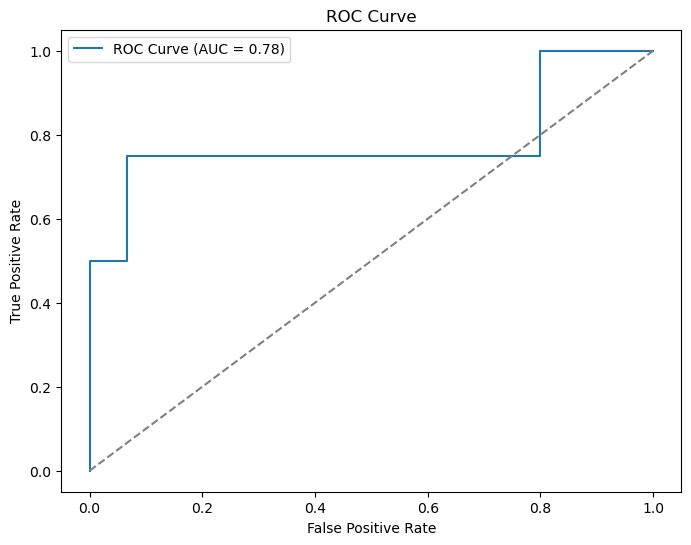

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_probs)
auc_score = roc_auc_score(y_test, y_test_pred_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()


#### vi. Separation

The classes are well separated which created many multi-colinearity and dependencies. 

#### vii. Imbalance

Yes there are inbalaces because only a couple of the cases were bending(1) and the rest (0). The significant difference in label count makes the misclassifications more prominent in the lower counts. 

In [59]:
from sklearn.utils import resample

In [92]:
#chatgpt: How to use resample to downsample the majority class so that it can be balanced between the minority class:
imbal_train_data = pd.concat([Xat3, yat3], axis=1)

#separate the 0 and 1 labels
maj_class = imbal_train_data[imbal_train_data['label'] == 0]
min_class = imbal_train_data[imbal_train_data['label'] == 1]

downsampled = resample(maj_class, replace=False, n_samples=len(min_class), random_state=44)

train_downsampled = pd.concat([downsampled, min_class])

# Split it up
X_resampled = train_downsampled.drop(columns=['label'])
y_resampled = train_downsampled['label']

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Train matrix: 
[[9 0]
 [0 9]]


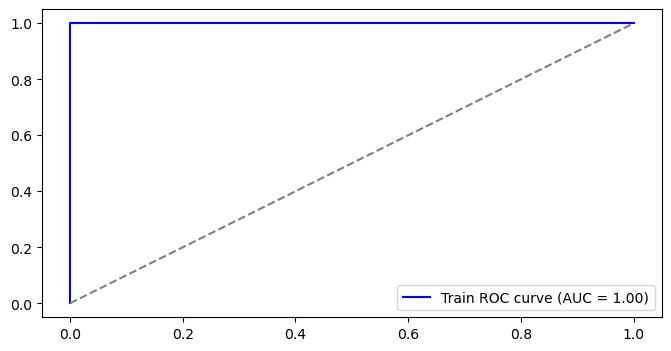

Test matrix: 
[[14  1]
 [ 1  3]]


[]

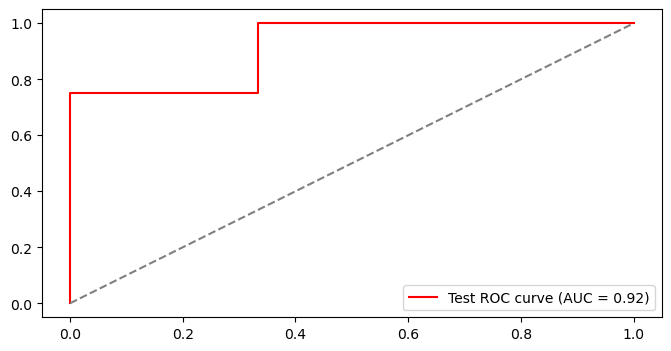

In [230]:
X_resampled_sm = add_constant(X_resampled)
logit_model_resampled = Logit(y_resampled, X_resampled_sm)
logit_result_resampled = logit_model_resampled.fit(method='bfgs')
y_train_pred_probs_resampled = logit_result_resampled.predict(X_resampled_sm)
y_train_pred_resampled = np.where(y_train_pred_probs_resampled >= 0.5, 1, 0)


# Calculate the confusion matrix for the training data
confusion_matrix_train_resampled = confusion_matrix(y_resampled, y_train_pred_resampled)
print("Train matrix: ")
print(confusion_matrix_train_resampled)
fpr_train, tpr_train, _ = roc_curve(y_resampled, y_train_pred_probs_resampled)
auc_train = roc_auc_score(y_resampled, y_train_pred_probs_resampled)


plt.figure(figsize=(8, 4))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend(loc='lower right')
plt.show()


# pred on test
y_test_pred_probs_resampled = logit_result_resampled.predict(X_test_sm)
y_test_pred_resampled = np.where(y_test_pred_probs_resampled >= 0.5, 1, 0)
confusion_matrix_resampled = confusion_matrix(y_test, y_test_pred_resampled)
print("Test matrix: ")
print(confusion_matrix_resampled)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_probs_resampled)
auc_test = roc_auc_score(y_test, y_test_pred_probs_resampled)


plt.figure(figsize=(8, 4))
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend(loc='lower right')
plt.plot()


### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [106]:
best_l_inl1 = None  # Variable to store the best l found during the grid search
best_accuracy = 0  # Variable to store the best accuracy

for l in range(1, 21):  # Loop through values of l from 1 to 20
    l1Features = []
    
    for train_df in trainData:
        num_segments = l
        segment_length = train_df.shape[0] // num_segments 
        segments = [train_df.iloc[i * segment_length:(i + 1) * segment_length] for i in range(num_segments - 1)]
        segments.append(train_df.iloc[(num_segments - 1) * segment_length:])

  
        combined_featuresL1 = {}
        for i, segment in enumerate(segments):
            suffix = string.ascii_lowercase[i]
            features = extract_and_suffix_features(segment, f'.{suffix}')
            combined_featuresL1.update(features)

        
        combined_featuresL1['label'] = train_df['label'].iloc[0]
        l1Features.append(combined_featuresL1)

    
    aggdfL1 = pd.DataFrame(l1Features)
    aggdfL1['label'] = aggdfL1['label'].apply(lambda x: 1 if x in ['bending1', 'bending2'] else 0)

    X = aggdfL1.drop(columns=['label'])
    y = aggdfL1['label']

    # L1 regularization model
    logistic_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)

    # C values for cross-validation
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    
    # 5-fold cross-validation
    skf = StratifiedKFold(n_splits=5)

    # Find best model
    grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=skf, scoring='accuracy')
    grid_search.fit(X, y)

    # Best model and accuracy
    if grid_search.best_score_ > best_accuracy:
        best_accuracy = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_l_inl1 = l  # Store the best l value

    print(f"l = {l}, Accuracy = {grid_search.best_score_:.4f}")

l = 1, Accuracy = 0.9714
l = 2, Accuracy = 0.9571
l = 3, Accuracy = 0.9429
l = 4, Accuracy = 0.9571
l = 5, Accuracy = 0.9429
l = 6, Accuracy = 0.9429
l = 7, Accuracy = 0.9429
l = 8, Accuracy = 0.9429
l = 9, Accuracy = 0.9429
l = 10, Accuracy = 0.9429
l = 11, Accuracy = 0.9714
l = 12, Accuracy = 0.9857
l = 13, Accuracy = 0.9571
l = 14, Accuracy = 0.9571
l = 15, Accuracy = 0.9571
l = 16, Accuracy = 0.9571
l = 17, Accuracy = 0.9714
l = 18, Accuracy = 0.9714
l = 19, Accuracy = 0.9714
l = 20, Accuracy = 0.9714


In [107]:
print(best_l_inl1)

12


In [120]:
l1Features_final = []

for train_df in trainData:
    num_segments = best_l_inl1  # Use the best l value from grid search
    segment_length = train_df.shape[0] // num_segments
    segments = [train_df.iloc[i * segment_length:(i + 1) * segment_length] for i in range(num_segments - 1)]
    segments.append(train_df.iloc[(num_segments - 1) * segment_length:])

    combined_features_final = {}
    for i, segment in enumerate(segments):
        suffix = string.ascii_lowercase[i]
        features = extract_and_suffix_features(segment, f'.{suffix}')
        combined_features_final.update(features)

    
    combined_features_final['label'] = train_df['label'].iloc[0]
    l1Features_final.append(combined_features_final)


l1aggdf_final = pd.DataFrame(l1Features_final)
l1aggdf_final['label'] = l1aggdf_final['label'].apply(lambda x: 1 if x in ['bending1', 'bending2'] else 0)


Xtrain_final = l1aggdf_final.drop(columns=['label'])
ytrain_final = l1aggdf_final['label']

logistic_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=skf, scoring='accuracy')
grid_search.fit(Xtrain_final, ytrain_final)
# Get best model
best_model_l1 = grid_search.best_estimator_

# Predict on training data
yL1_pred = best_model_l1.predict(Xtrain_final)

# Calculate confusion matrix
confusionL1Matrix = confusion_matrix(ytrain_final, yL1_pred)
print("Confusion matrix for training data:\n", confusionL1Matrix)

Confusion matrix for training data:
 [[60  0]
 [ 0  9]]


In [121]:
test_l1Features = []
for test_df in testData:
    num_segments = best_l_inl1  
    segment_length = test_df.shape[0] // num_segments
    segments = [test_df.iloc[i * segment_length:(i + 1) * segment_length] for i in range(num_segments - 1)]
    segments.append(test_df.iloc[(num_segments - 1) * segment_length:])

    combined_features_test = {}
    for i, segment in enumerate(segments):
        suffix = string.ascii_lowercase[i]
        features = extract_and_suffix_features(segment, f'.{suffix}')
        combined_features_test.update(features)

    
    combined_features_test['label'] = test_df['label'].iloc[0] if 'label' in test_df else None
    test_l1Features.append(combined_features_test)


L1aggdf_test = pd.DataFrame(test_l1Features)
L1aggdf_test['label'] =  L1aggdf_test['label'].apply(lambda x: 1 if x in ['bending1', 'bending2'] else 0)

Xtestl1 = L1aggdf_test.drop(columns=['label'])
ytestl1 = L1aggdf_test['label']

logistic_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}


grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=skf, scoring='accuracy')
grid_search.fit(Xtestl1, ytestl1)

best_model_l1 = grid_search.best_estimator_

# Predict on training data
yL1_predTest = best_model_l1.predict(Xtestl1)

# Calculate confusion matrix
confusionL1MatrixTest = confusion_matrix(ytestl1, yL1_predTest)
print("Confusion matrix for test data:\n", confusionL1MatrixTest)


Confusion matrix for test data:
 [[15  0]
 [ 0  4]]


#### ii. Comparison

The L1 penalization performs better and is easier to implement due to the colinearity in the data. It automatically selects relevant features and regularizes the data. 

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [134]:

warnings.filterwarnings("ignore")

best_l_multiple = None  
best_accuracy_multiple = 0  
best_model_multiple = None  

for l_multiple in range(1, 21):  
    l1Features_multiple = []
    
    for train_df_multiple in trainData:
        num_segments_multiple = l_multiple 
        segment_length_multiple = train_df_multiple.shape[0] // num_segments_multiple 
        segments_multiple = [train_df_multiple.iloc[i * segment_length_multiple:(i + 1) * segment_length_multiple] for i in range(num_segments_multiple - 1)]
        segments_multiple.append(train_df_multiple.iloc[(num_segments_multiple - 1) * segment_length_multiple:])

        combined_featuresL1_multiple = {}
        for i_multiple, segment_multiple in enumerate(segments_multiple):
            suffix_multiple = string.ascii_lowercase[i_multiple]
            features_multiple = extract_and_suffix_features(segment_multiple, f'.{suffix_multiple}')
            combined_featuresL1_multiple.update(features_multiple)

        
        combined_featuresL1_multiple['label'] = train_df_multiple['label'].iloc[0]
        l1Features_multiple.append(combined_featuresL1_multiple)

    
    aggdfL1_multiple = pd.DataFrame(l1Features_multiple)
    
    # multiclass
    aggdfL1_multiple['label'] = aggdfL1_multiple['label'].apply(lambda x: x)  # Keep original labels for multi-class

    
    X_multiple = aggdfL1_multiple.drop(columns=['label'])
    y_multiple = aggdfL1_multiple['label']

    logistic_model_multiple = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=2000)

    param_grid_multiple = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    
    # 5-fold cross-validation
    skf_multiple = StratifiedKFold(n_splits=5)

    # Find best model
    grid_search_multiple = GridSearchCV(estimator=logistic_model_multiple, param_grid=param_grid_multiple, cv=skf_multiple, scoring='accuracy')
    grid_search_multiple.fit(X_multiple, y_multiple)

    # Best model and accuracy
    if grid_search_multiple.best_score_ > best_accuracy_multiple:
        best_accuracy_multiple = grid_search_multiple.best_score_
        best_model_multiple = grid_search_multiple.best_estimator_
        best_l_multiple = l_multiple  # Store the best l value

    print(f"l = {l_multiple}, Accuracy = {grid_search_multiple.best_score_:.4f}")


l = 1, Accuracy = 0.8846
l = 2, Accuracy = 0.8275
l = 3, Accuracy = 0.8143
l = 4, Accuracy = 0.7989
l = 5, Accuracy = 0.8429
l = 6, Accuracy = 0.8286
l = 7, Accuracy = 0.7989
l = 8, Accuracy = 0.7692
l = 9, Accuracy = 0.8132
l = 10, Accuracy = 0.7418
l = 11, Accuracy = 0.7692
l = 12, Accuracy = 0.7692
l = 13, Accuracy = 0.7407
l = 14, Accuracy = 0.7703
l = 15, Accuracy = 0.7692
l = 16, Accuracy = 0.7538
l = 17, Accuracy = 0.7681
l = 18, Accuracy = 0.7692
l = 19, Accuracy = 0.7396
l = 20, Accuracy = 0.7571


In [135]:
train_l1Features_multiple = []
for train_df_multiple in trainData:
    num_segments_multiple = best_l_multiple  # Use best l
    segment_length_multiple = train_df_multiple.shape[0] // num_segments_multiple
    segments_multiple = [train_df_multiple.iloc[i * segment_length_multiple:(i + 1) * segment_length_multiple] for i in range(num_segments_multiple - 1)]
    segments_multiple.append(train_df_multiple.iloc[(num_segments_multiple - 1) * segment_length_multiple:])

    combined_featuresL1_multiple = {}
    for i_multiple, segment_multiple in enumerate(segments_multiple):
        suffix_multiple = string.ascii_lowercase[i_multiple]
        features_multiple = extract_and_suffix_features(segment_multiple, f'.{suffix_multiple}')
        combined_featuresL1_multiple.update(features_multiple)

    
    combined_featuresL1_multiple['label'] = train_df_multiple['label'].iloc[0]
    train_l1Features_multiple.append(combined_featuresL1_multiple)


train_aggdfL1_multiple = pd.DataFrame(train_l1Features_multiple)


X_train_multiple = train_aggdfL1_multiple.drop(columns=['label'])
y_train_multiple = train_aggdfL1_multiple['label']

y_train_pred_multiple = best_model_multiple.predict(X_train_multiple)
train_error_multiple = 1 - accuracy_score(y_train_multiple, y_train_pred_multiple)
print(f'Train Error: {train_error_multiple:.4f}')
print("Train confusion matrix:", confusion_matrix(y_train_multiple, y_train_pred_multiple))

Train Error: 0.0000
Train confusion matrix: [[ 5  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0 12]]


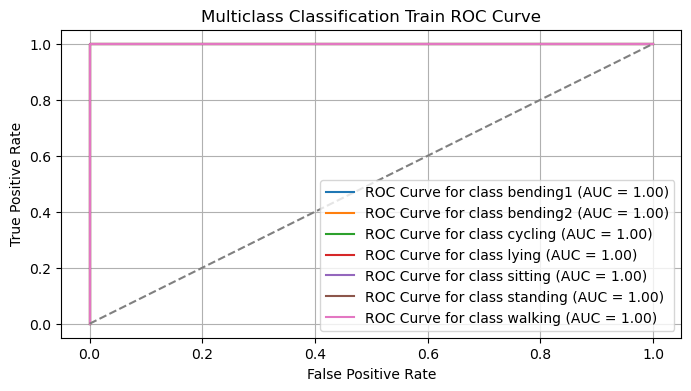

In [228]:

y_train_score_multiple = best_model_multiple.predict_proba(X_train_multiple)

#Contains all the classes
classList = best_model_multiple.classes_
fpr_train = {}
tpr_train = {}
roc_auc_train = {}
# Compute ROC curve and ROC area for each class
for i in range(len(classList)):  # Iterate through the indices of classList
    if np.any(y_train_multiple == classList[i]):  # Check if the class exists in predictions
        fpr_train[classList[i]], tpr_train[classList[i]], _ = roc_curve(y_train_multiple, y_train_score_multiple[:, i], pos_label=classList[i])
        roc_auc_train[classList[i]] = auc(fpr_train[classList[i]], tpr_train[classList[i]])

# Plot ROC curves for training data
plt.figure(figsize=(8, 4))
for i in range(len(classList)):
    if classList[i] in roc_auc_train:  # Only plot if AUC value was calculated
        plt.plot(fpr_train[classList[i]], tpr_train[classList[i]], label=f'ROC Curve for class {classList[i]} (AUC = {roc_auc_train[classList[i]]:.2f})')

#roc curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass Classification Train ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [163]:
test_l1Features_multiple = []
for test_df_multiple in testData:
    num_segments_multiple = best_l_multiple 
    segment_length_multiple = test_df_multiple.shape[0] // num_segments_multiple
    segments_multiple = [test_df_multiple.iloc[i * segment_length_multiple:(i + 1) * segment_length_multiple] for i in range(num_segments_multiple - 1)]
    segments_multiple.append(test_df_multiple.iloc[(num_segments_multiple - 1) * segment_length_multiple:])

    combined_featuresL1_multiple = {}
    for i_multiple, segment_multiple in enumerate(segments_multiple):
        suffix_multiple = string.ascii_lowercase[i_multiple]
        features_multiple = extract_and_suffix_features(segment_multiple, f'.{suffix_multiple}')
        combined_featuresL1_multiple.update(features_multiple)

    # Add label to combined features
    combined_featuresL1_multiple['label'] = test_df_multiple['label'].iloc[0]
    test_l1Features_multiple.append(combined_featuresL1_multiple)
    
test_aggdfL1_multiple = pd.DataFrame(test_l1Features_multiple)

X_test_multiple = test_aggdfL1_multiple.drop(columns=['label'])
y_test_multiple = test_aggdfL1_multiple['label']

y_pred_multiple = best_model_multiple.predict(X_test_multiple)

test_error_multiple = np.mean(y_pred_multiple != y_test_multiple)
print(f'Test Error: {test_error_multiple:.4f}')

y_test_pred_multiple = best_model_multiple.predict(X_test_multiple)
test_error_multiple = 1 - accuracy_score(y_test_multiple, y_test_pred_multiple)
print("Train confusion matrix:", confusion_matrix(y_test_multiple, y_test_pred_multiple))

Test Error: 0.1579
Train confusion matrix: [[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]


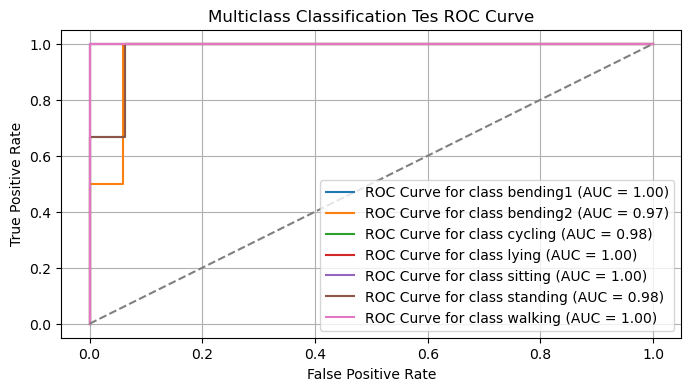

In [227]:
y_test_score_multiple = best_model_multiple.predict_proba(X_test_multiple)
# chatgpt: Why am i getting  multiclass format is not supported. chat told me use format below:
# Contains all the classes
classList = best_model_multiple.classes_
fpr_test = {}
tpr_test = {}
roc_auc_test = {}

# Compute ROC curve and ROC area for each class
for i in range(len(classList)):  
    if np.any(y_test_multiple == classList[i]):
        fpr_test[classList[i]], tpr_test[classList[i]], _ = roc_curve(y_test_multiple, y_test_score_multiple[:, i], pos_label=classList[i])
        roc_auc_test[classList[i]] = auc(fpr_test[classList[i]], tpr_test[classList[i]])
plt.figure(figsize=(8, 4))

for i in range(len(classList)):
    if classList[i] in roc_auc_test:
        plt.plot(fpr_test[classList[i]], tpr_test[classList[i]], label=f'ROC Curve for class {classList[i]} (AUC = {roc_auc_test[classList[i]]:.2f})')

# ROC curve diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass Classification Tes ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### ii. Naive Bayes

In [192]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [172]:
best_gaussian_l = None  
best_gaussian_accuracy = 0  
best_gaussian_model = None

for l in range(1, 21):
    naive_bayes_features = []
    
    for train_df in trainData:
        num_segments = l  
        segment_length = train_df.shape[0] // num_segments 
        segments = [train_df.iloc[i * segment_length:(i + 1) * segment_length] for i in range(num_segments - 1)]
        segments.append(train_df.iloc[(num_segments - 1) * segment_length:])
        
        combined_features_naive_bayes = {}
        for i, segment in enumerate(segments):
            suffix = string.ascii_lowercase[i]
            features = extract_and_suffix_features(segment, f'.{suffix}')
            combined_features_naive_bayes.update(features)
        
        
        combined_features_naive_bayes['label'] = train_df['label'].iloc[0]
        naive_bayes_features.append(combined_features_naive_bayes)

    
    aggdf_naive_bayes = pd.DataFrame(naive_bayes_features)

   
    X_gaussian = aggdf_naive_bayes.drop(columns=['label'])
    y_gaussian = aggdf_naive_bayes['label']

   
    gaussian_nb = GaussianNB()
    gaussian_nb.fit(X_gaussian, y_gaussian)

    y_pred_gaussian = gaussian_nb.predict(X_gaussian)

    # Evaluate Gaussian Naïve Bayes
    gaussian_accuracy = accuracy_score(y_gaussian, y_pred_gaussian)

    print(f"l = {l}, Gaussian Naïve Bayes Accuracy = {gaussian_accuracy:.4f}")
    
    # Store the best model if necessary
    if gaussian_accuracy > best_gaussian_accuracy:
        best_gaussian_accuracy = gaussian_accuracy
        best_gaussian_model = gaussian_nb  # Store the best Gaussian Naïve Bayes model
        best_gaussian_l = l  # Store the best l value

# At the end, display the best accuracy and model details
print(f"Best l: {best_gaussian_l}, Best Accuracy: {best_gaussian_accuracy:.4f}")


l = 1, Gaussian Naïve Bayes Accuracy = 1.0000
l = 2, Gaussian Naïve Bayes Accuracy = 1.0000
l = 3, Gaussian Naïve Bayes Accuracy = 1.0000
l = 4, Gaussian Naïve Bayes Accuracy = 0.9855
l = 5, Gaussian Naïve Bayes Accuracy = 0.9855
l = 6, Gaussian Naïve Bayes Accuracy = 0.9855
l = 7, Gaussian Naïve Bayes Accuracy = 1.0000
l = 8, Gaussian Naïve Bayes Accuracy = 0.9855
l = 9, Gaussian Naïve Bayes Accuracy = 1.0000
l = 10, Gaussian Naïve Bayes Accuracy = 1.0000
l = 11, Gaussian Naïve Bayes Accuracy = 0.9855
l = 12, Gaussian Naïve Bayes Accuracy = 1.0000
l = 13, Gaussian Naïve Bayes Accuracy = 1.0000
l = 14, Gaussian Naïve Bayes Accuracy = 1.0000
l = 15, Gaussian Naïve Bayes Accuracy = 1.0000
l = 16, Gaussian Naïve Bayes Accuracy = 1.0000
l = 17, Gaussian Naïve Bayes Accuracy = 1.0000
l = 18, Gaussian Naïve Bayes Accuracy = 1.0000
l = 19, Gaussian Naïve Bayes Accuracy = 1.0000
l = 20, Gaussian Naïve Bayes Accuracy = 1.0000
Best l: 1, Best Accuracy: 1.0000


In [175]:
naive_bayes_features_besttrain = []
for bestTrain in trainData: 
    num_segments = best_gaussian_l  
    segment_length = bestTrain.shape[0] // num_segments 
    segments = [bestTrain.iloc[i * segment_length:(i + 1) * segment_length] for i in range(num_segments - 1)]
    segments.append(bestTrain.iloc[(num_segments - 1) * segment_length:])

    combined_features_naive_bayes = {}
    for i, segment in enumerate(segments):
        suffix = string.ascii_lowercase[i]
        features = extract_and_suffix_features(segment, f'.{suffix}')
        combined_features_naive_bayes.update(features)

    combined_features_naive_bayes['label'] = bestTrain['label'].iloc[0]
    naive_bayes_features_besttrain.append(combined_features_naive_bayes)
aggdf_naive_bayes_bestTrain = pd.DataFrame(naive_bayes_features_besttrain)
X_gaussian_bestTrain = aggdf_naive_bayes_bestTrain.drop(columns=['label'])
y_gaussian_bestTrain = aggdf_naive_bayes_bestTrain['label']


In [177]:
from sklearn.preprocessing import label_binarize

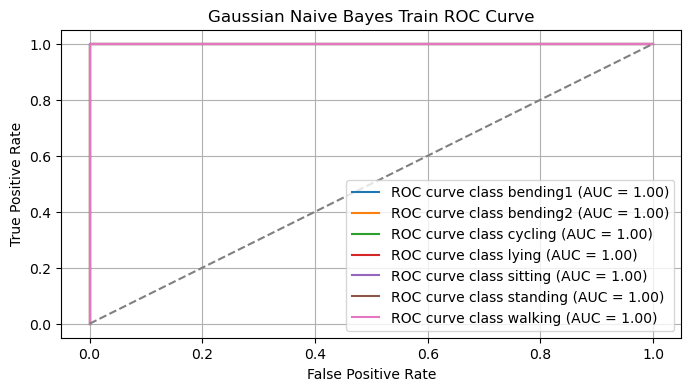

In [211]:
classes = np.unique(y_gaussian_bestTrain)
y_bin = label_binarize(y_gaussian_bestTrain, classes=classes)
# Get probabilities for all classes
y_prob_gaussian = best_gaussian_model.predict_proba(X_gaussian_bestTrain)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob_gaussian[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_prob_gaussian[:, i])

plt.figure(figsize=(8, 4))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i],  label=f'ROC curve class {classes[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes Train ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [186]:
naive_bayes_features_test = []
for test in testData:
    num_segments = best_gaussian_l
    segment_length = test.shape[0] // num_segments
    segments = [test.iloc[i * segment_length:(i + 1) * segment_length] for i in range(num_segments - 1)]
    segments.append(test.iloc[(num_segments - 1) * segment_length:])

    combined_features_naive_bayes = {}
    for i, segment in enumerate(segments):
        suffix = string.ascii_lowercase[i]
        features = extract_and_suffix_features(segment, f'.{suffix}')
        combined_features_naive_bayes.update(features)

    combined_features_naive_bayes['label'] = test['label'].iloc[0]
    naive_bayes_features_test.append(combined_features_naive_bayes)

aggdf_naive_bayes_test = pd.DataFrame(naive_bayes_features_test)

X_gaussian_test = aggdf_naive_bayes_test.drop(columns=['label'])
y_gaussian_test = aggdf_naive_bayes_test['label']

classes = np.unique(y_gaussian_test)  
y_bintest = label_binarize(y_gaussian_test, classes=classes)

y_prob_gaussiantest = best_gaussian_model.predict_proba(X_gaussian_test)

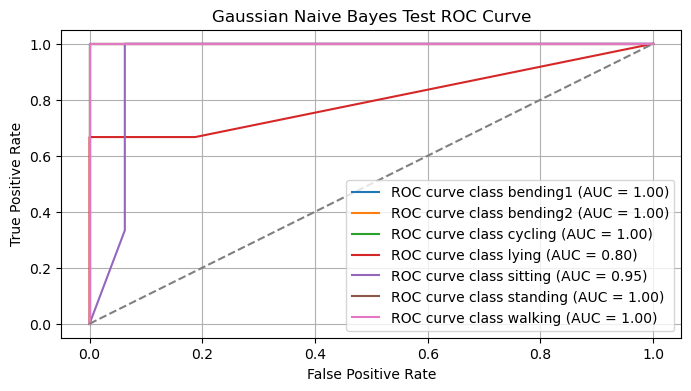

In [208]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_bintest[:, i], y_prob_gaussiantest[:, i])
    roc_auc[i] = roc_auc_score(y_bintest[:, i], y_prob_gaussiantest[:, i])

plt.figure(figsize=(8, 4))

for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes Test ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [193]:
best_mnb_l = None  
best_mnb_accuracy = 0  
best_mnb_model = None

for l in range(1, 21):
    naive_bayes_features = []
    
    for train_df in trainData:
        num_segments = l  
        segment_length = train_df.shape[0] // num_segments 
        segments = [train_df.iloc[i * segment_length:(i + 1) * segment_length] for i in range(num_segments - 1)]
        segments.append(train_df.iloc[(num_segments - 1) * segment_length:])

        combined_features_naive_bayes = {}
        for i, segment in enumerate(segments):
            suffix = string.ascii_lowercase[i]
            features = extract_and_suffix_features(segment, f'.{suffix}')
            combined_features_naive_bayes.update(features)
  
        combined_features_naive_bayes['label'] = train_df['label'].iloc[0]
        naive_bayes_features.append(combined_features_naive_bayes)

    aggdf_naive_bayes = pd.DataFrame(naive_bayes_features)
    X_mnb = aggdf_naive_bayes.drop(columns=['label'])
    y_mnb = aggdf_naive_bayes['label']


    multinomial_nb = MultinomialNB()
    multinomial_nb.fit(X_mnb, y_mnb)

    # Predict using Multinomial Naïve Bayes
    y_pred_mnb = multinomial_nb.predict(X_mnb)

    # Evaluate Multinomial Naïve Bayes
    mnb_accuracy = accuracy_score(y_mnb, y_pred_mnb)

    print(f"l = {l}, Multinomial Naïve Bayes Accuracy = {mnb_accuracy:.4f}")
    
    if mnb_accuracy > best_mnb_accuracy:
        best_mnb_accuracy = mnb_accuracy
        best_mnb_model = multinomial_nb  
        best_mnb_l = l  

print(f"Best l: {best_mnb_l}, Best Accuracy: {best_mnb_accuracy:.4f}")

l = 1, Multinomial Naïve Bayes Accuracy = 0.9275
l = 2, Multinomial Naïve Bayes Accuracy = 0.8841
l = 3, Multinomial Naïve Bayes Accuracy = 0.8986
l = 4, Multinomial Naïve Bayes Accuracy = 0.9130
l = 5, Multinomial Naïve Bayes Accuracy = 0.9275
l = 6, Multinomial Naïve Bayes Accuracy = 0.9565
l = 7, Multinomial Naïve Bayes Accuracy = 0.9420
l = 8, Multinomial Naïve Bayes Accuracy = 0.9420
l = 9, Multinomial Naïve Bayes Accuracy = 0.9420
l = 10, Multinomial Naïve Bayes Accuracy = 0.9420
l = 11, Multinomial Naïve Bayes Accuracy = 0.9420
l = 12, Multinomial Naïve Bayes Accuracy = 0.9420
l = 13, Multinomial Naïve Bayes Accuracy = 0.9420
l = 14, Multinomial Naïve Bayes Accuracy = 0.9420
l = 15, Multinomial Naïve Bayes Accuracy = 0.9420
l = 16, Multinomial Naïve Bayes Accuracy = 0.9420
l = 17, Multinomial Naïve Bayes Accuracy = 0.9420
l = 18, Multinomial Naïve Bayes Accuracy = 0.9420
l = 19, Multinomial Naïve Bayes Accuracy = 0.9420
l = 20, Multinomial Naïve Bayes Accuracy = 0.9420
Best l: 6

In [196]:
naive_bayes_featuresMultiBest = []
for bestTrain in trainData:
    num_segments = best_mnb_l  
    segment_length = bestTrain.shape[0] // num_segments 
    segments = [bestTrain.iloc[i * segment_length:(i + 1) * segment_length] for i in range(num_segments - 1)]
    segments.append(bestTrain.iloc[(num_segments - 1) * segment_length:])

    combined_features_naive_bayes = {}
    for i, segment in enumerate(segments):
        suffix = string.ascii_lowercase[i]
        features = extract_and_suffix_features(segment, f'.{suffix}')
        combined_features_naive_bayes.update(features)

    combined_features_naive_bayes['label'] = bestTrain['label'].iloc[0]
    naive_bayes_featuresMultiBest.append(combined_features_naive_bayes)
aggdf_naive_bayesBest = pd.DataFrame(naive_bayes_featuresMultiBest)
X_mnbBest = aggdf_naive_bayesBest.drop(columns=['label'])
y_mnbBest = aggdf_naive_bayesBest['label']

y_pred_mnbBest = best_mnb_model.predict(X_mnbBest)


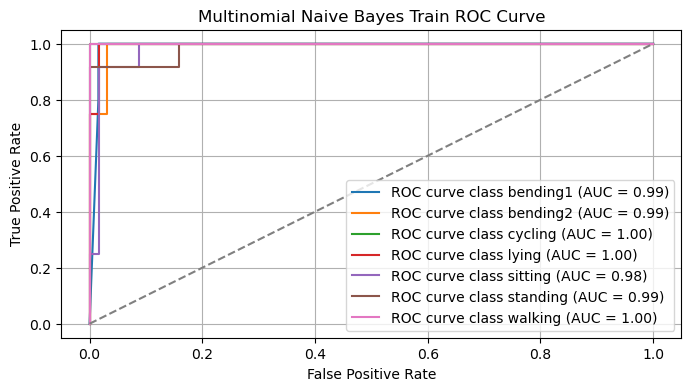

In [209]:
multiclassesT = np.unique(y_mnbBest)

y_bin = label_binarize(y_mnbBest, classes=multiclassesT)
y_prob_mnb = best_mnb_model.predict_proba(X_mnbBest)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob_mnb[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_prob_mnb[:, i])
plt.figure(figsize=(8, 4))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multinomial Naive Bayes Train ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [198]:
naive_bayes_features_Multitest = []
for test in testData:
    num_segments = best_mnb_l 
    segment_length = test.shape[0] // num_segments
    segments = [test.iloc[i * segment_length:(i + 1) * segment_length] for i in range(num_segments - 1)]
    segments.append(test.iloc[(num_segments - 1) * segment_length:])

    combined_features_naive_bayes = {}
    for i, segment in enumerate(segments):
        suffix = string.ascii_lowercase[i]
        features = extract_and_suffix_features(segment, f'.{suffix}')
        combined_features_naive_bayes.update(features)

    combined_features_naive_bayes['label'] = test['label'].iloc[0]
    naive_bayes_features_Multitest.append(combined_features_naive_bayes)

aggdf_naive_bayes_test = pd.DataFrame(naive_bayes_features_Multitest)

X_mnb_test = aggdf_naive_bayes_test.drop(columns=['label'])
y_mnb_test = aggdf_naive_bayes_test['label']

classes = np.unique(y_mnb_test)

# Binarize the test labels for ROC
y_bin_test = label_binarize(y_mnb_test, classes=classes)

# Get probabilities for all classes using the best Multinomial Naive Bayes model
y_prob_mnb_test = best_mnb_model.predict_proba(X_mnb_test)

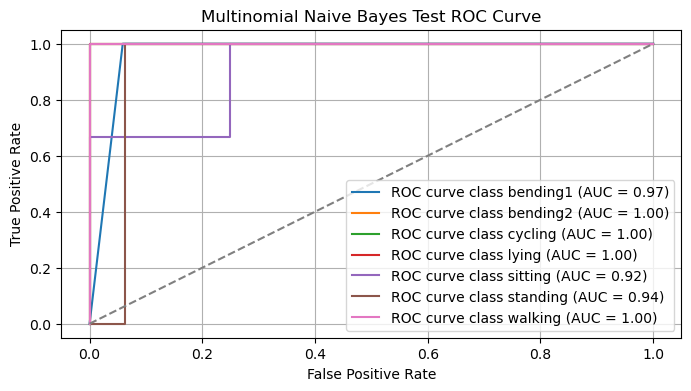

In [210]:
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

for i in range(len(classes)):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_bin_test[:, i], y_prob_mnb_test[:, i])
    roc_auc_test[i] = roc_auc_score(y_bin_test[:, i], y_prob_mnb_test[:, i])
plt.figure(figsize=(8, 4))
for i in range(len(classes)):
    plt.plot(fpr_test[i], tpr_test[i], label=f'ROC curve class {classes[i]} (AUC = {roc_auc_test[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multinomial Naive Bayes Test ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### ii. Comparison

Comparing all the models, multiclass logistic regression performed the best and had the lowest test error. 

## 3. ISLR 4.8.3

If homework is not showing up, they are on the side in the same notebook folder

![hw4.8.3](./4-8-3.png)

## 4. ISLR 4.8.7

![hw 4.8.7](./4-8-7.png)

## 5.1. Extra Practice ISLR 4.8.4

## 5.2. Extra Practice ISLR 4.8.9